<a href="https://colab.research.google.com/github/Manoj-S375/PRODIGY_ML_03/blob/main/CatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np


# **Pre-Processing of the data**

In [16]:
classname = ['0','1']

In [17]:
imgsz = (224,224)
batsz = 24
train_dt = image_dataset_from_directory("drive/My Drive/dogvscat/train",
                                        labels="inferred",label_mode='int',
                                        seed = 1337,
                                        image_size= imgsz,
                                        batch_size = batsz)

Found 500 files belonging to 2 classes.


In [18]:
test_dt = image_dataset_from_directory("drive/My Drive/dogvscat/test",
                                        labels="inferred",label_mode='int',
                                        seed = 1337,
                                        image_size= imgsz,
                                        batch_size = batsz)

Found 50 files belonging to 2 classes.


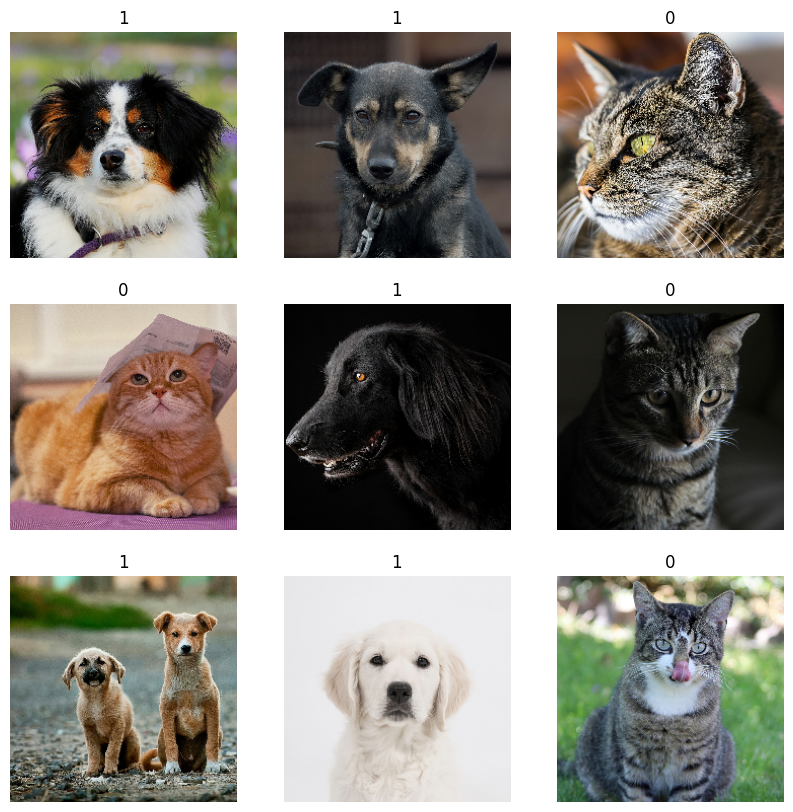

In [19]:
import matplotlib.pyplot as plt
import numpy
labels = ["cat","dog"]
plt.figure(figsize=(10,10))
for images,labels in train_dt.take(1):
  #print(labels)
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

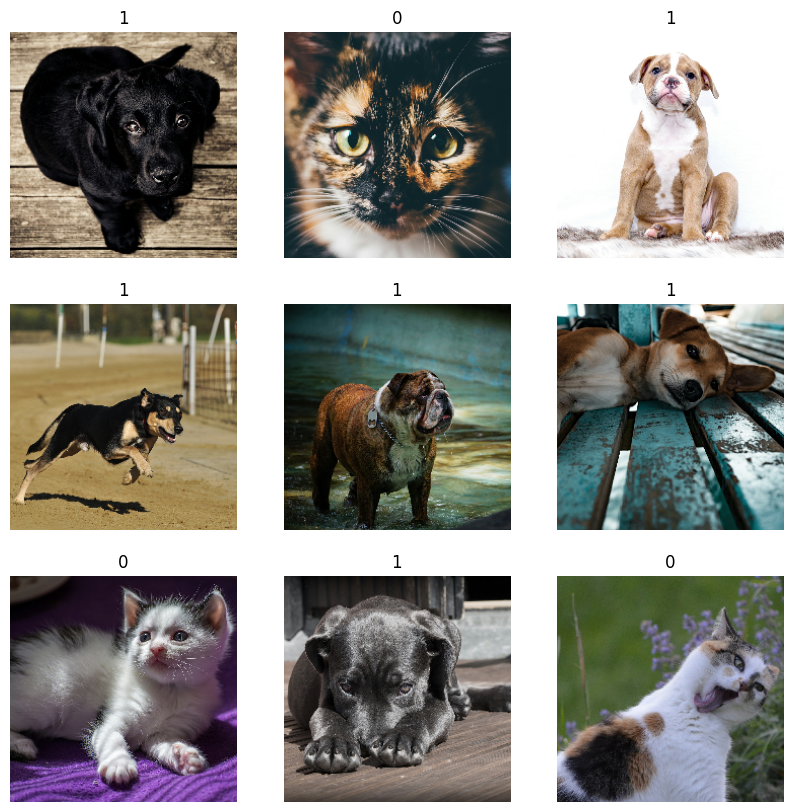

In [20]:
import matplotlib.pyplot as plt
import numpy
labels = ["cat","dog"]
plt.figure(figsize=(10,10))
for images,labels in test_dt.take(1):
  #print(labels)
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

# **SVM Classifier Model From Scratch**

In [27]:
import numpy as np

X_train_flatten, y_train_flatten = [], []
for images, labels in train_dt:
    X_train_flatten.extend(images)
    y_train_flatten.extend(labels)

X_test_flatten, y_test_flatten = [], []
for images, labels in test_dt:
    X_test_flatten.extend(images)
    y_test_flatten.extend(labels)

X_train_flatten = np.array(X_train_flatten)
y_train_flatten = np.array(y_train_flatten)
X_test_flatten = np.array(X_test_flatten)
y_test_flatten = np.array(y_test_flatten)

X_train_flatten = X_train_flatten.reshape(X_train_flatten.shape[0], -1)
X_test_flatten = X_test_flatten.reshape(X_test_flatten.shape[0], -1)
print(X_train_flatten.shape)

(500, 150528)


In [36]:
print(y_train_flatten.shape)

(500,)


In [48]:
from sklearn.decomposition import PCA
num_components = 50
pca = PCA(n_components=num_components)

# Fit and transform the training data
X_train_pca = pca.fit_transform(X_train_flatten)
X_test_pca = pca.fit_transform(X_test_flatten)


In [49]:
X_train_pca = np.array(X_train_pca)
X_train_pca.shape

(500, 50)

In [51]:
class SVMClassifier:
    def __init__(self, learning_rate, regularization_strength, num_epochs):
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def hinge_loss(self, X, y):
        margins = 1 - y * (np.dot(X, self.weights) + self.bias)
        return np.maximum(0, margins)

    def cost(self, X, y):
        loss = self.hinge_loss(X, y)
        regularization_term = 0.5 * self.regularization_strength * np.dot(self.weights, self.weights)
        return np.mean(loss) + regularization_term

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0.0

        for epoch in range(self.num_epochs):
            for i in range(num_samples):
                if y[i] * (np.dot(X[i], self.weights) + self.bias) >= 1:
                    dW = self.regularization_strength * self.weights
                    db = 0
                else:
                    dW = self.regularization_strength * self.weights - y[i] * X[i]
                    db = -y[i]

                self.weights -= self.learning_rate * dW
                self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

svm_model = SVMClassifier(0.1, 1.0,100)
svm_model.fit(X_train_pca, y_train_flatten)



# **SVM Classifier using sklearn library**

In [ ]:
X_train_flatten, y_train_flatten = [], []
for images, labels in train_dt:
    X_train_flatten.extend(images)
    y_train_flatten.extend(labels)

X_test_flatten, y_test_flatten = [], []
for images, labels in test_dt:
    X_test_flatten.extend(images)
    y_test_flatten.extend(labels)

X_train_flatten = np.array(X_train_flatten).reshape(-1, 224 * 224 * 3)
X_test_flatten = np.array(X_test_flatten).reshape(-1, 224 * 224 * 3)

clf = svm.SVC(kernel='linear')

clf.fit(X_train_flatten, y_train_flatten)

In [56]:
y_pred = clf.predict(X_test_flatten)
y = np.array(y_test_flatten)
print("Actual Values\n",y,"\n Predicted Values\n",y_pred)

Actual Values
 [1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 0 1 1 0 1 1] 
 Predicted Values
 [1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 1 1 1 0 1 0]


In [62]:
import cv2
import numpy as np

image_path = "/content/drive/MyDrive/dogvscat/train/1/107.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))
image_flatten = image.reshape(1, -1)

prediction = clf.predict(image_flatten)
print("Dog") if prediction == 1 else print("Cat")




Dog
